In [1]:
from umap_ import *
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline
import seaborn as sns
import umap.umap_ as umap
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import networkx as nx
import plotly.graph_objects as go
import math
import plotly
sns.set(style='white', context='poster', rc={'figure.figsize':(10,8)})

In [2]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# Separating out the features
f = df.loc[:, features].values
# Separating out the target
t = df.loc[:,['target']].values
# Standardizing the features
f = StandardScaler().fit_transform(f)

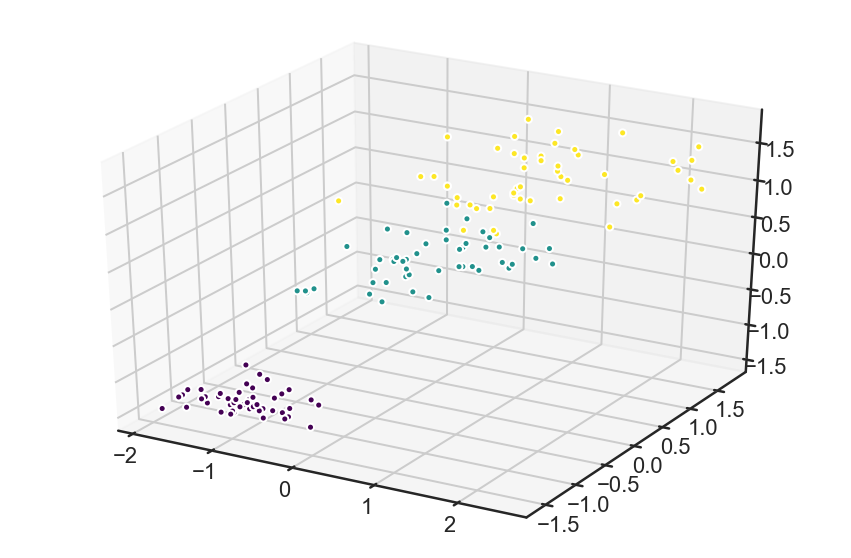

In [90]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs = f[:,0]
ys = f[:,2]
zs = f[:,3]
ax.scatter(xs, ys, zs, c= t, cmap = 'viridis', s=50, alpha=1, edgecolors='w')



plt.show()

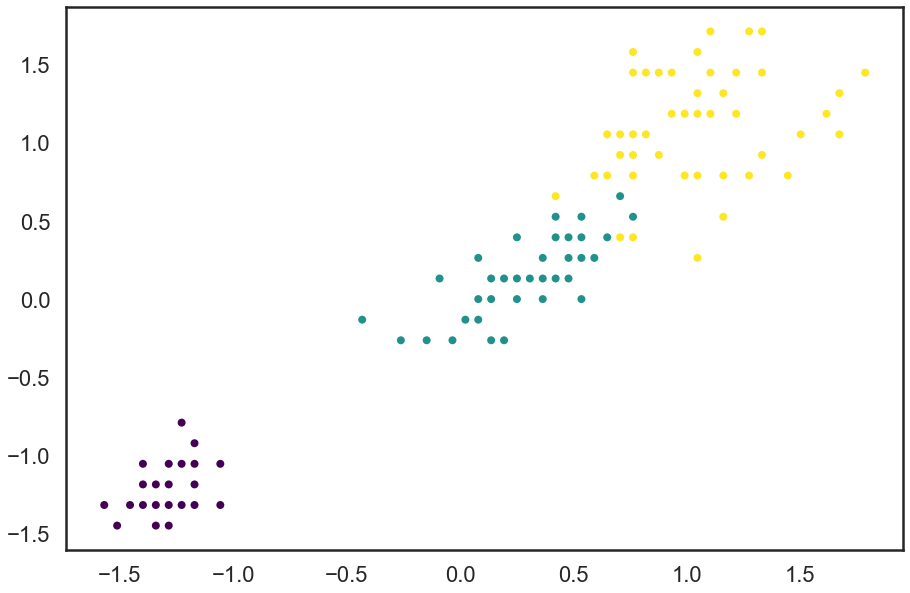

In [23]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

plt.scatter(f[:,2],f[:,3],c=t,cmap= 'viridis',s=100, alpha=1, edgecolors='w')

In [173]:
knn_indices_i, knn_dists_i, _ = nearest_neighbors(
            f, n_neighbors=5, metric='euclidean', metric_kwds={}, angular='False', random_state=np.random.RandomState(), verbose='False'
        )
sigmas_i, rhos_i = smooth_knn_dist(
        knn_dists_i, float(15), local_connectivity=float(1),
    )
radii_iris = []
for i in range(len(sigmas_i)):
    radii_iris.append((max(knn_dists_i[i])))
#dcolor_iris = set(radii_iris)
#dcolor_iris
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dcolor_iris = le.fit_transform(radii_iris)
dcolor_iris

Fri Aug 14 11:57:59 2020 Finding Nearest Neighbors
Fri Aug 14 11:57:59 2020 Building RP forest with 6 trees
Fri Aug 14 11:57:59 2020 NN descent for 7 iterations
	 0  /  7
	 1  /  7
	 2  /  7
	 3  /  7
	 4  /  7
Fri Aug 14 11:57:59 2020 Finished Nearest Neighbor Search


array([  1,   0,  16,  10,  13,  65,  78,   3,  92,   8,  60,  22,  12,
        82, 108, 135,  88,   9,  95,  26,  22,  25,  97,  69,  38,  15,
        18,   5,   5,   7,   4,  45, 117, 122,   6,  40,  49,  44,  63,
         5,  12, 136,  39,  80,  54,  14,  23,   2,  26,  22, 113,  89,
        47,  91,  41,  56, 109, 126,  32, 110, 134,  83, 124,  21,  57,
        61,  55,  67, 123,  28,  96,  66, 101,  73,  41,  27, 103,  70,
        31,  50,  30,  76,  19,  64,  94, 130,  35, 104,  29,  59,  46,
        24,  33, 114,  19,  57,  11,  20, 115,  17,  90,  79, 100,  72,
        53, 106, 132, 102, 128, 133,  77,  74,  43, 121, 127,  86,  36,
       137, 131, 129,  42, 116, 105,  68,  87, 119,  62,  85,  81, 111,
       107, 138,  99,  58, 120, 125,  93,  71,  75,  52,  37,  42,  79,
        34,  84,  51, 112,  48, 118,  98], dtype=int64)

In [163]:
from matplotlib.patches import Circle

def draw_circle(position, radius,
                        ax=None, from_size=0.1, to_size=0.5, n_ellipses=3,
                        alpha=1, color=None,
                        **kwargs):
    ax = ax or plt.gca()
    # Draw the Ellipse
    for nsig in np.linspace(from_size, to_size, n_ellipses):
        ax.add_patch(Circle(position, nsig * radius, alpha=alpha, lw=1, color=color, **kwargs, zorder = 1))

(-3.0, 4.0)

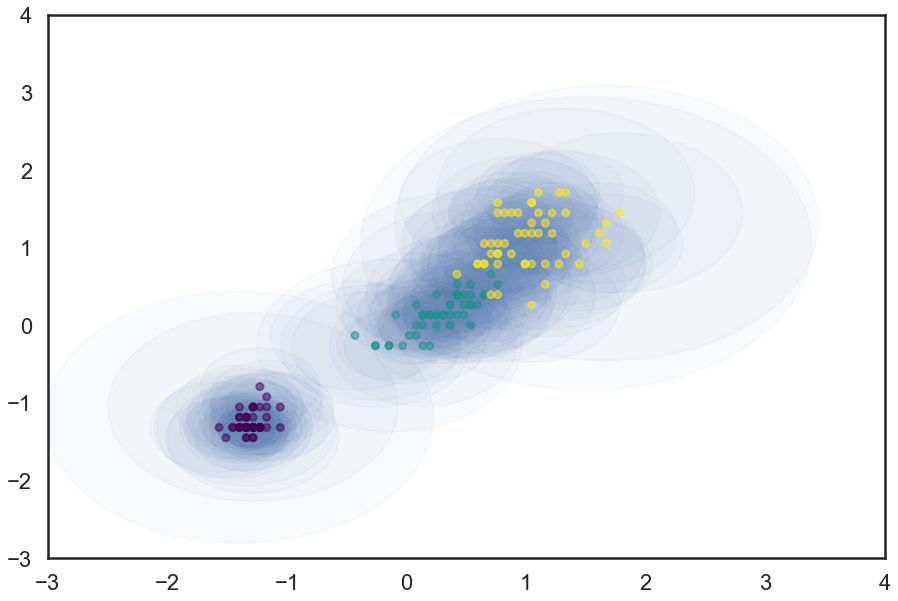

In [174]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)


for i in range(0,len(sigmas_i)):
    circle = plt.Circle((f[i,2], f[i,3]), max(knn_dists_i[i]),fill=True, color ='b', alpha = 0.03)
    ax.add_artist(circle)

ax.scatter(f[:,2],f[:,3],
           c=t, cmap= 'viridis',
           s=50, alpha=0.5, zorder =2)
ax.set_xlim((-3,4))
ax.set_ylim((-3,4))

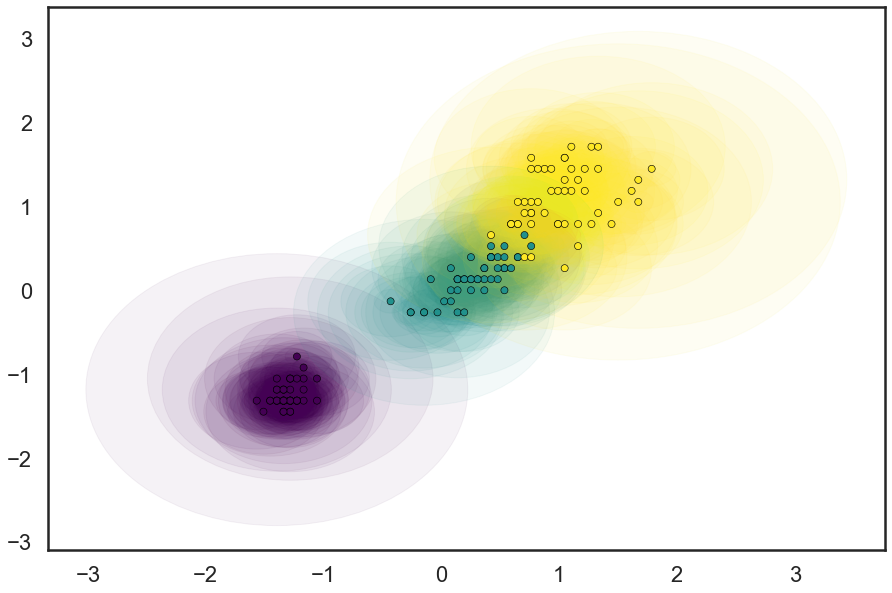

In [176]:
#W.R.T The Cluster
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
colors = plt.get_cmap('viridis')(np.linspace(0, 1, 3))
for i in range(len(sigmas_i)):
    pos = f[i, 2:4]
    draw_circle(pos, max(knn_dists_i[i]),
                        ax, color=colors[int(t[i])],
                        from_size=0.2, to_size=1.0, alpha=0.05)

ax.scatter(f[:,2],f[:,3],
           c=t, cmap= 'viridis',
           s=50, alpha=1, zorder =2, edgecolor = 'black',linewidth = 0.6)

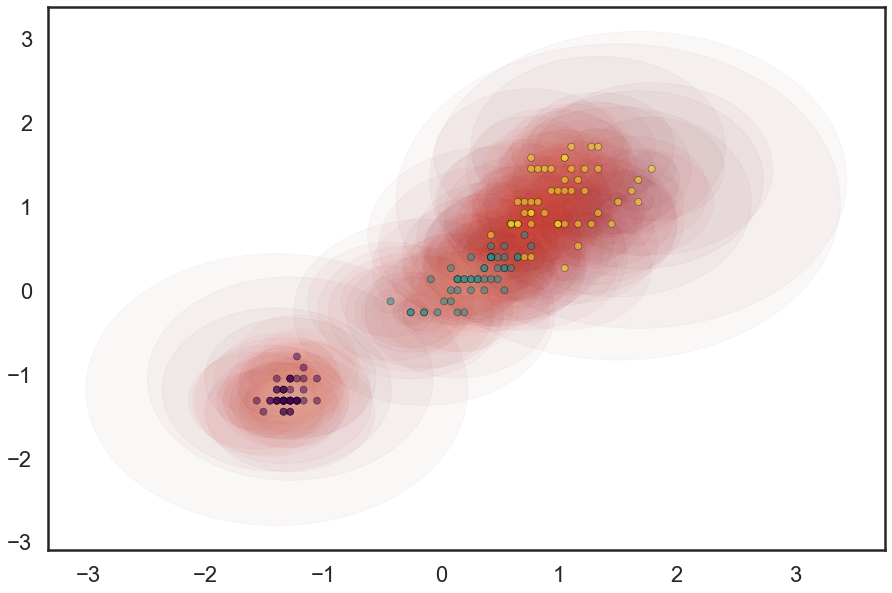

In [177]:
#W.R.T Radius
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
colors = plt.get_cmap('Reds')(np.linspace(0, 1, max(dcolor_iris)+1))
for i in range(len(sigmas_i)):
    pos = f[i,2:4]
    draw_circle(pos, max(knn_dists_i[i]),
                        ax, color=colors[dcolor_iris[i]],
                        from_size=0.2, to_size=1.0, alpha=0.03)
ax.scatter(f[:,2],f[:,3],
           c=t, cmap= 'viridis',
           s=50, alpha=0.5, zorder =2, edgecolor = 'black',linewidth = 0.6)

In [190]:
knn_indices_i, knn_dists_i, _ = nearest_neighbors(
            f, n_neighbors=15, metric='euclidean', metric_kwds={}, angular='False', random_state=np.random.RandomState(), verbose='False'
        )
sigmas_i, rhos_i = smooth_knn_dist(
        knn_dists_i, float(15), local_connectivity=float(1),
    )
radii_iris = []
for i in range(len(sigmas_i)):
    radii_iris.append((max(knn_dists_i[i])))
#dcolor_iris = set(radii_iris)
#dcolor_iris
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dcolor_iris = le.fit_transform(radii_iris)
dcolor_iris

Fri Aug 14 12:02:12 2020 Finding Nearest Neighbors
Fri Aug 14 12:02:12 2020 Building RP forest with 6 trees
Fri Aug 14 12:02:12 2020 NN descent for 7 iterations
	 0  /  7
	 1  /  7
	 2  /  7
Fri Aug 14 12:02:12 2020 Finished Nearest Neighbor Search


array([  6,  51,  10,  14,  12, 111,  33,   3,  81,  43,  39,  11,  30,
       103, 134, 141, 111,   1, 110,  69,  50,  25,  86,  29,  20,  78,
         7,   8,   9,   5,  17,  59, 125, 137,  37,  15,  64,  21,  72,
         0,   4, 140,  49,  32,  82,  47,  68,  13,  18,   2, 112,  74,
        93, 108,  46,  19, 101, 131,  67,  96, 138,  27, 124,  23,  75,
        98,  66,  73, 128,  88, 102,  34, 104,  31,  52,  60, 100,  41,
        16,  90,  85,  92,  58,  54,  95, 121,  79, 122,  77,  84,  76,
        28,  62, 132,  48,  56,  24,  38, 123,  22, 115,  87,  80,  36,
        45, 133, 129, 120, 119, 135,  53,  69,  42, 118, 116,  52,  55,
       142, 139, 127,  89, 107, 136,  70,  71, 109,  35,  65,  91, 113,
       126, 143,  97,  26, 106, 130, 117,  57,  63,  44,  58,  94,  87,
        83,  99,  61, 105,  40, 114,  56], dtype=int64)

(-3.0, 4.0)

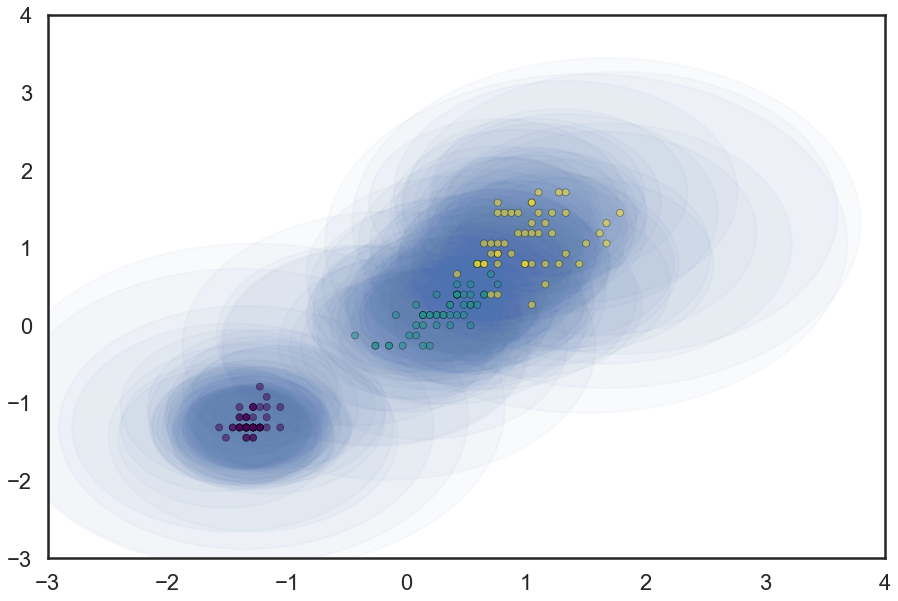

In [191]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)


for i in range(0,len(sigmas_i)):
    circle = plt.Circle((f[i,2], f[i,3]), max(knn_dists_i[i]),fill=True, color ='b', alpha = 0.03)
    ax.add_artist(circle)

ax.scatter(f[:,2],f[:,3],
           c=t, cmap= 'viridis',
           s=50, alpha=0.5, zorder =2, edgecolor = 'black',linewidth = 0.6)
ax.set_xlim((-3,4))
ax.set_ylim((-3,4))

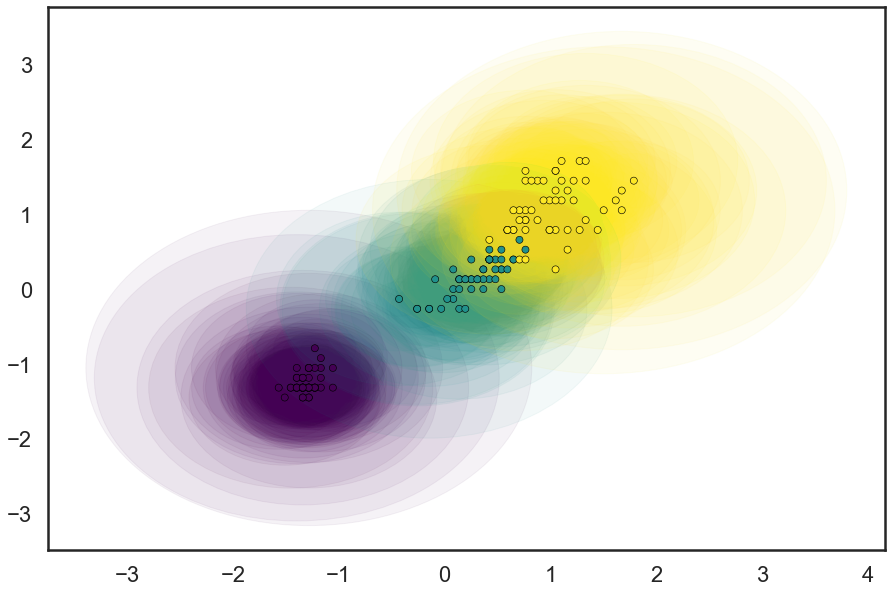

In [192]:
#W.R.T The Cluster
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
colors = plt.get_cmap('viridis')(np.linspace(0, 1, 3))
for i in range(len(sigmas_i)):
        pos = f[i, 2:4]
        draw_circle(pos, max(knn_dists_i[i]),
                        ax, color=colors[int(t[i])],
                        from_size=0.2, to_size=1.0, alpha=0.05)

ax.scatter(f[:,2],f[:,3],
           c=t, cmap= 'viridis',
           s=50, alpha=1, zorder =2, edgecolor = 'black',linewidth = 0.6)

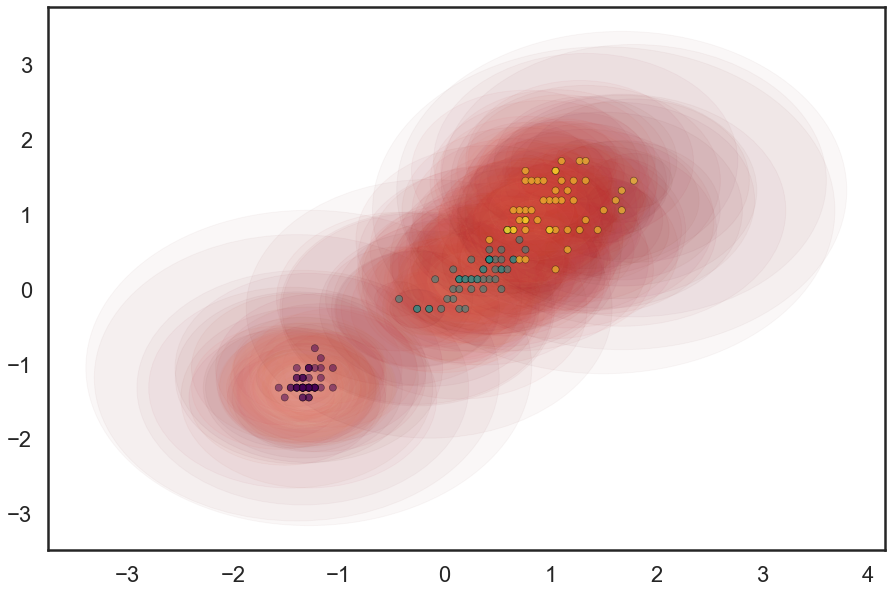

In [193]:
#W.R.T Radius
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
colors = plt.get_cmap('Reds')(np.linspace(0, 1, max(dcolor_iris)+1))
for i in range(len(sigmas_i)):
    pos = f[i,2:4]
    draw_circle(pos, max(knn_dists_i[i]),
                        ax, color=colors[dcolor_iris[i]],
                        from_size=0.2, to_size=1.0, alpha=0.03)
ax.scatter(f[:,2],f[:,3],
           c=t, cmap= 'viridis',
           s=50, alpha=0.5, zorder =2, edgecolor = 'black',linewidth = 0.6)